### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [142]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [143]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head(5)

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [144]:
#2
df.info()

#conclusion
# The dataset includes 6,194 applicants and various attributes such as application ID, gender, international status, GPA, major, race,
# GMAT score, work experience, work industry, and admission status. Each applicant has a unique application ID, and all provide important
# academic information like GPA and GMAT scores, which helps assess their readiness for the program.
# However, there are many missing values in the race and admission status columns, which may limit insights into demographic representation and admission trends.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [145]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)
print(admission_counts)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [146]:
#3b
race_counts = df['race'].value_counts(dropna=False)
print(race_counts)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [147]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

<ipython-input-147-12caece74d44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-147-12caece74d44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [148]:
#5
missing = df.isnull().sum()
missing

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [149]:
# 6
df = df.drop(columns=['application_id'])

7. show describe column and conclude what the insight is from that column

In [150]:
#7
description = df[['gpa', 'gmat', 'work_exp']].describe()
description

#conclusion
# The dataset reveals insights about 6,194 applicants, showing an average GPA of 3.25, indicating solid academic performance with scores ranging from 2.65 to 3.77.
# The average GMAT score is 651, which is competitive, with scores between 570 and 780. Additionally, applicants have about 5 years of work experience on average.
# Overall, this suggests a well-prepared applicant pool for graduate studies, although some may need additional support due to lower GPA and GMAT scores.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

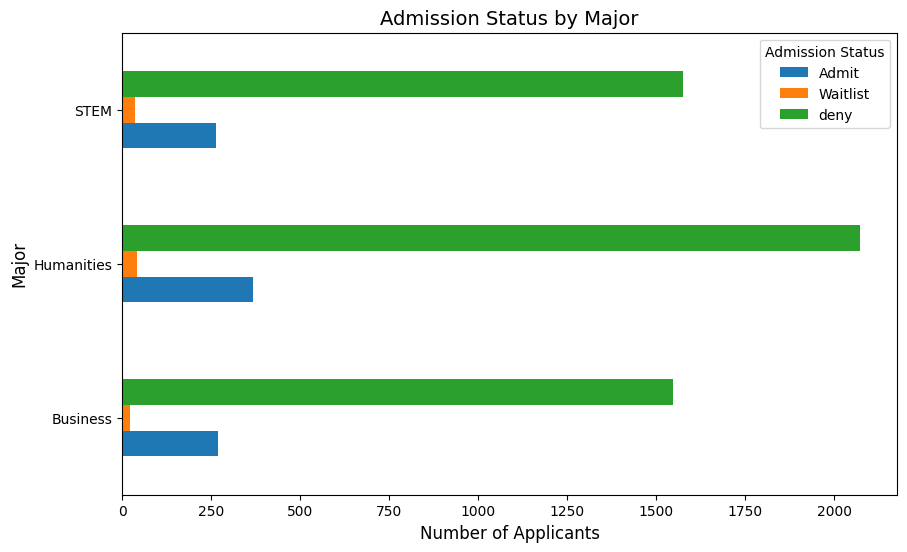

In [151]:
#8

admission_major_count = df.groupby(['major', 'admission'])['admission'].count().unstack()
admission_major_count.plot(kind='barh', figsize = (10, 6))

plt.title('Admission Status by Major', fontsize=14)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title="Admission Status")

plt.show()

# conclusion
# The chart displays the admission status for STEM, Humanities, and Business majors. STEM had the most applicants, followed by Humanities and Business.
# Most applicants were denied admission across all majors. STEM had the highest number of admissions, while Humanities and Business had fewer.
# The waitlist was relatively small for all majors. Overall, competition for admission was high, especially for STEM.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

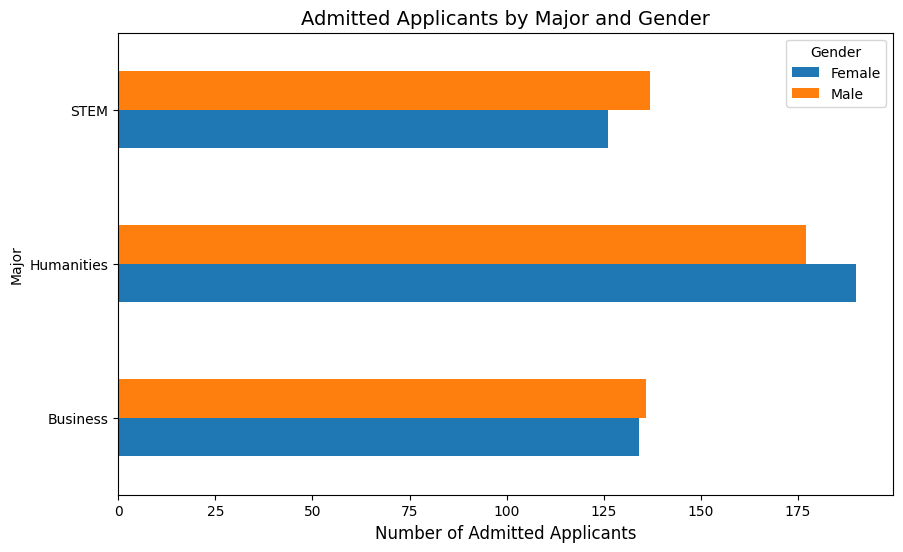

In [152]:
#9
df_admit = df[df['admission'] == 'Admit']

major_count_by_gender = df_admit.groupby(['major', 'gender'])['gender'].count().unstack()
major_count_by_gender.plot(kind='barh', figsize = (10, 6))

plt.title('Admitted Applicants by Major and Gender', fontsize=14)
plt.xlabel('Number of Admitted Applicants', fontsize=12)
plt.ylabel('Major', fontsize=10)
plt.legend(title="Gender")

plt.show()

#conclusion
# The bar chart shows admitted applicants in three majors—STEM, Humanities, and Business—by gender.
# Based on the visualization,  Overall, there is a balanced admission rate for both males and females.
# However, the STEM field exhibits a gender disparity, with more males admitted than females, reflecting common trends in science and technology.
# In contrast, the Humanities major has more admitted female applicants.

10. create your own insightful visualization and explain it in at least 2 sentences

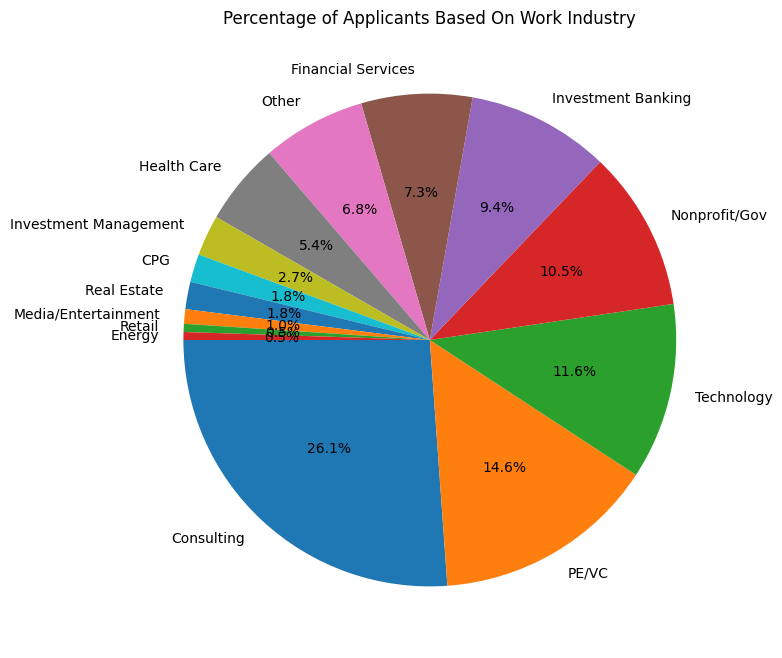

In [153]:
#10
# explanation
# This pie chart shows the percentage of applicants by work industry. It allows us to quickly see which industries are most represented, making it easier
# to discuss recruitment strategies. The chart highlights dominant industries and is visually appealing, helping engage viewers.
# Overall, it provides valuable insights that can guide hiring decisions and align recruitment efforts with industry trends.

work_indust = df['work_industry'].value_counts()
plt.figure(figsize=(8, 8))

plt.pie(work_indust, labels = work_indust.index, autopct='%1.1f%%', startangle=180)
plt.title('Percentage of Applicants Based On Work Industry')

plt.show()

11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


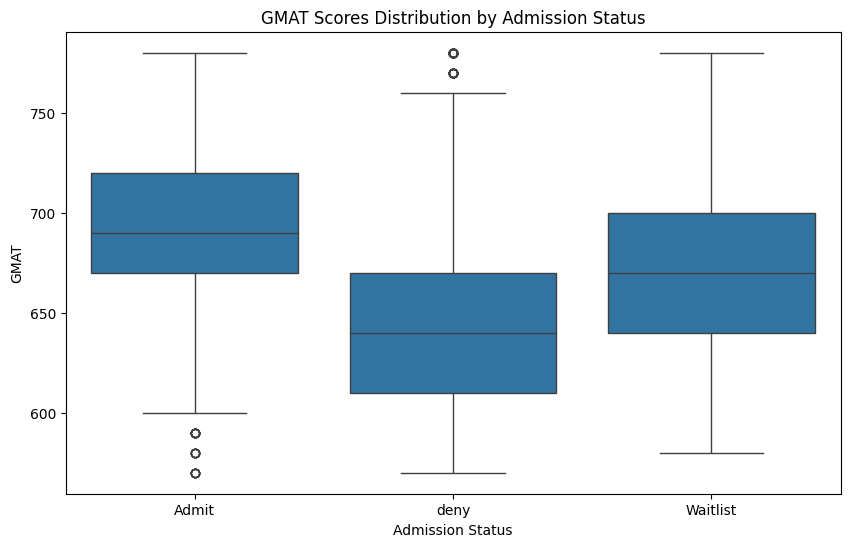

In [154]:
#11
# Explanation
# The box plot allows for a straightforward comparison of GMAT score distributions between admitted and not admitted applicants.
# This can help identify patterns or trends in how GMAT scores relate to admission outcomes.
# By this visualization, institutions can make informed decisions regarding admissions criteria and policies, potentially leading to
# fairer and more transparent admissions processes.

import seaborn as sns
plt.figure(figsize=(10, 6))

sns.boxplot(x='admission', y='gmat', data=df)
plt.title('GMAT Scores Distribution by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GMAT')
plt.show()

12. encode categorical columns and display the results

In [155]:
#12a
#encode X

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [156]:
#12b
#encode y

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['admission'] = encoder.fit_transform(df['admission'])
df['admission'] = df['admission'].replace({2: 1})
df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,1
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,1
4,1,0,3.35,2,2,590.0,4,1,1


13. create a heatmap to see the correlation and explain the conclusion

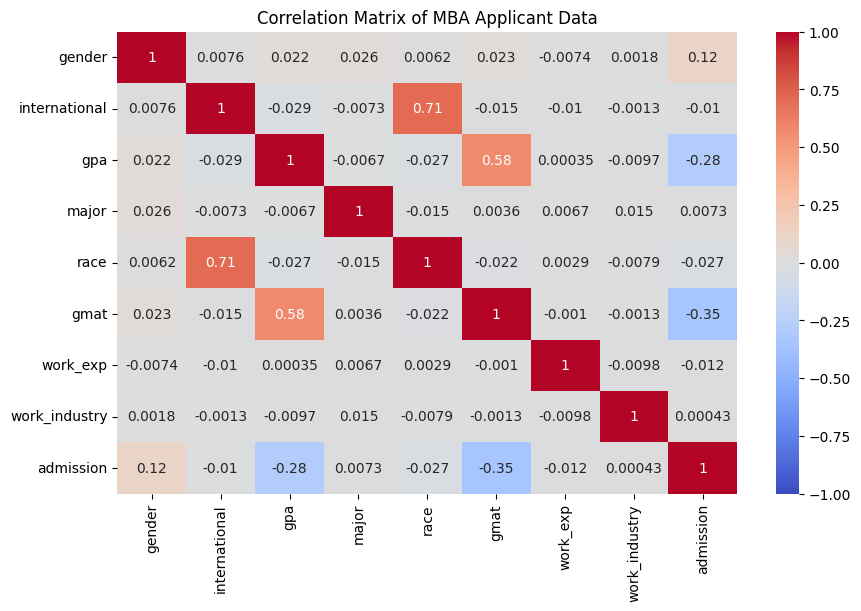

In [157]:
#13
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()

#Conclusion
# The correlation matrix shows relationships between variables in MBA applicant data. International applicants are often from a specific racial group.
# Higher GPAs are associated with higher GMAT scores. Work experience and industry have a weak relationship. GPA and GMAT may not strongly predict admission.
# Gender and major have little influence on admission. Overall, the relationships between variables are weak and complex, and multiple factors should be
# considered for admissions decisions.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [158]:
#Challenge
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

mean = df['gpa'].mean()
# print(mean)
predicted_role_encoded = clf.predict([[0,0,mean,0,0,580,2,3]])
predicted_role = encoder.inverse_transform(predicted_role_encoded)

print(f"Predicted role for the character: {predicted_role[0]}")


Accuracy of the model: 0.8095238095238095
Predicted role for the character: Waitlist


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
